In [52]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import requests
%matplotlib inline
plt.style.use('ggplot')

personal_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/2018?format=json').json()
household_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/household/2018?format=json').json()


In [53]:
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/"

year_list = ["2014", "2015", "2016", "2017", "2018"]

# Set empty lists to hold personal data
weight = []
ager = []
gender = []
hincome = []
newcrime = []
locationr = []
years = []
region=[]
notify=[]

# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json" 
    response = requests.get(query)
    response_json = response.json()
    
    data_list = response_json["personalData"]
  
    for data in data_list:
        
        try: 
            region.append(data['region'])
            years.append(data['year'])
            weight.append(data['weight'])
            ager.append(data['ager'])
            notify.append(data['notify'])
            gender.append(data['gender'])
            hincome.append(data['hincome'])
            newcrime.append(data['newoff'])
            locationr.append(data['locationr'])
        except Exception:
            print(data)

In [54]:
#Create a dataframe
ncvs = pd.DataFrame({
    "region":region,
    "file report":notify,
    "year": years,
    "weight": weight,
    "ager": ager,
    "gender": gender,
    "hincome": hincome,
    "newcrime":newcrime,
    "locationr": locationr})

ncvs.head()


,region,file report,year,weight,ager,gender,hincome,newcrime,locationr
0,3,1,2014,2877.2646,5,2,4,1,2
1,3,2,2014,4079.9336,4,1,88,3,3
2,3,1,2014,5984.119,4,2,88,3,2
3,3,2,2014,3271.8376,6,1,4,3,5
4,3,1,2014,3402.2559,6,1,88,4,1


In [55]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Personal Crime  API

ncvs['ager'] = ncvs['ager'].replace({"1":"12-14",
        "2":"15-17",
        "3": "18-20",
        "4": "21-24",                         
        "5": "25-34",
        "6": "35-49",
        "7": "50-64",                         
        "8": "65+"})

ncvs['gender'] = ncvs['gender'].replace({"1":"Male",
        "2":"Female"})


ncvs['region'] = ncvs['region'].replace({"1":"NorthEast",
        "2": "MidWest",
        "3": "South",
        "4": "West"})

ncvs['file report'] = ncvs['file report'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})



ncvs['hincome'] = ncvs['hincome'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs['locationr'] = ncvs['locationr'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs['newcrime'] = ncvs['newcrime'].replace({"1":"Rape/sexual assault",
        "2": "Robbery",
        "3": "Aggravated assault",
        "4": "Simple assault",
        "5": "Personal theft"})

ncvs = ncvs.rename(columns = {'ager': 'age', 'hincome': 'income', 
                     'newcrime': 'crime type', 'locationr': 'location'})

ncvs.head()


,region,file report,year,weight,age,gender,income,crime type,location
0,South,Yes,2014,2877.2646,25-34,Female,25k-34.9k,Rape/sexual assault,friend/neighbor/relative's home
1,South,No,2014,4079.9336,21-24,Male,Unknown,Aggravated assault,com/parking lot or public
2,South,Yes,2014,5984.119,21-24,Female,Unknown,Aggravated assault,friend/neighbor/relative's home
3,South,No,2014,3271.8376,35-49,Male,25k-34.9k,Aggravated assault,other location
4,South,Yes,2014,3402.2559,35-49,Male,Unknown,Simple assault,victim's home


In [56]:
#Set url for Household Crimes  API
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/household/"

# Set empty lists to hold data
weight_h =[]
ager_h = []
gender_h = []
hincome_h = []
newcrime_h = []
locationr_h = []
years_h = []
region_h=[]
notify_h=[]


# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json"
    response = requests.get(query)
    response_json = response.json()
    
    data_list=response_json["householdData"]
  
    for data in data_list:
        
        try: 
            region_h.append(data['region'])
            years_h.append(data['year'])
            weight_h.append(data['weight'])
            ager_h.append(data['hhage'])
            notify_h.append(data['notify'])
            gender_h.append(data['hhgen'])
            hincome_h.append(data['hincome'])
            newcrime_h.append(data['newoff'])
            locationr_h.append(data['locationr'])
        except Exception:
           print(data)

In [57]:
#Creating Dataframesfor household data
ncvs_h = pd.DataFrame({
    "region_h":region_h,
    "notify_h":notify_h,
    "year_h": years_h,
    "weight_h": weight_h,
    "age_h": ager_h,
    "gender_h": gender_h,
    "hincome_h": hincome_h,
    "newcrime_h": newcrime_h,
    "locationr_h": locationr_h})

ncvs_h.head()


,region_h,notify_h,year_h,weight_h,age_h,gender_h,hincome_h,newcrime_h,locationr_h
0,2,1,2014,1895.1135,2,2,7,6,1
1,3,2,2014,1610.5946,4,2,4,8,1
2,3,1,2014,1674.6003,3,2,2,8,3
3,2,2,2014,1231.1396,4,2,2,6,1
4,2,2,2014,1456.5726,3,1,4,6,1


In [58]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Household Crime  API

ncvs_h['age_h'] = ncvs_h['age_h'].replace({"1":"<19",
        "2":"20-34",
        "3": "35-49",
        "4": "50-64",
        "5": "65+"})

ncvs_h['gender_h'] = ncvs_h['gender_h'].replace({"1":"Male",
        "2":"Female"})


ncvs_h['region_h'] = ncvs_h['region_h'].replace({"1":"Northeast",
        "2": "Midwest",
        "3": "South",
        "4": "West"})

ncvs_h['notify_h'] = ncvs_h['notify_h'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})


ncvs_h['hincome_h'] = ncvs_h['hincome_h'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs_h['locationr_h'] = ncvs_h['locationr_h'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs_h['newcrime_h'] = ncvs_h['newcrime_h'].replace({"8":"Theft",
        "7": "Motor-vehicle theft",
        "6": "Burglary/trespassing"})

ncvs_h = ncvs_h.rename(columns = {'region_h': 'region', 'notify_h': 'file report',
                       'year_h': 'year', 'weight_h': 'weight',
                       'age_h': 'age', 'gender_h': 'gender',
                       'hincome_h': 'income', 'newcrime_h':'crime type',
                       'locationr_h': 'location'})

ncvs_h.head()

,region,file report,year,weight,age,gender,income,crime type,location
0,Midwest,Yes,2014,1895.1135,20-34,Female,75k+,Burglary/trespassing,victim's home
1,South,No,2014,1610.5946,50-64,Female,25k-34.9k,Theft,victim's home
2,South,Yes,2014,1674.6003,35-49,Female,7.5k-14.9k,Theft,com/parking lot or public
3,Midwest,No,2014,1231.1396,50-64,Female,7.5k-14.9k,Burglary/trespassing,victim's home
4,Midwest,No,2014,1456.5726,35-49,Male,25k-34.9k,Burglary/trespassing,victim's home


---
## Analysis by Income
---

###### Personal Crime Victimization by Income Category For All Four Regions, 2014 - 2018

In [59]:
#ncvs['year'].unique()

# Create GroupBy object based on "income":
grouped_pincome_df=ncvs.groupby(['income'])

# Total number of victims in each income group:
total_pvictims_by_grup=grouped_pincome_df['gender'].count()
#total_pvictims_by_grup

# Total number of victims:
total_pvictims=ncvs['income'].count()
#total_pvictims

# Calculate percentage of victims in each income group:
pct_of_pvictims=(total_pvictims_by_grup/total_pvictims)*100
#pct_of_pvictims

# Change index:
pct_of_pvictims=pct_of_pvictims.reset_index()
pct_of_pvictims

# Sort by income groups:
pct_of_pvictims.loc[[6,4,0,1,2,3,5,7],:]

,income,gender
6,<7.5k,7.862434
4,7.5k-14.9k,9.682540
0,15k-24.9k,10.677249
1,25k-34.9k,9.841270
2,35k-49.9k,10.814815
3,50k-74.9k,12.095238
5,75k+,21.354497
7,Unknown,17.671958


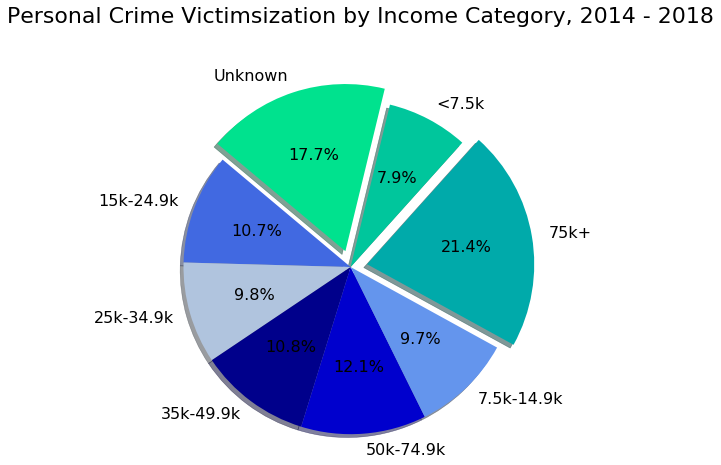

In [67]:
# Personal crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_pvictims['gender'], labels=pct_of_pvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Personal Crime Victimsization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

#plt.savefig('output_data/Personal Crime Income.png', bbox_inches='tight')

plt.show()

---
###### Household Crime Victimization by Income Category For All Four Regions, 2014 - 2018

In [11]:
# Create GroupBy object based on "income":
grouped_hincome_df=ncvs_h.groupby(['income'])

# Total number of victims in each income group:
total_hvictims_by_grup=grouped_hincome_df['gender'].count()
#total_hvictims_by_grup

# Total number of victims:
total_hvictims=ncvs_h['income'].count()
#total_hvictims

# Calculate percentage of victims in each income group:
pct_of_hvictims=(total_hvictims_by_grup/total_hvictims)*100
#pct_of_hvictims

# Change index:
pct_of_hvictims=pct_of_hvictims.reset_index()
pct_of_hvictims

# Sort by income groups:
pct_of_hvictims.loc[[6,4,0,1,2,3,5,7],:]

,income,gender
6,<7.5k,5.424775
4,7.5k-14.9k,7.933183
0,15k-24.9k,9.463035
1,25k-34.9k,9.611886
2,35k-49.9k,11.803297
3,50k-74.9k,12.790121
5,75k+,22.730029
7,Unknown,20.243674


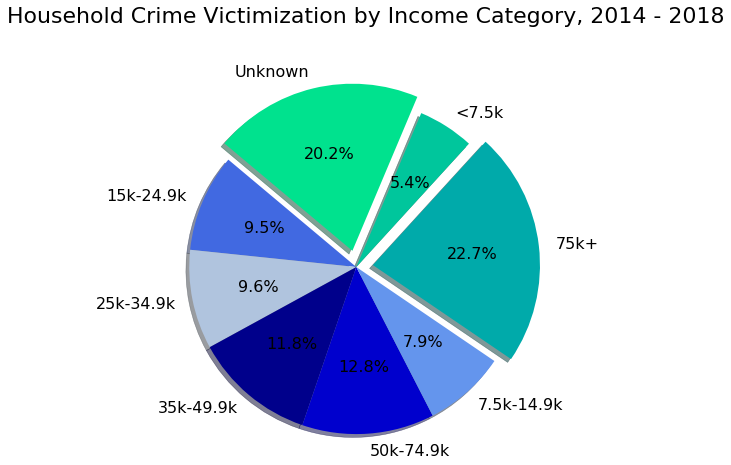

In [68]:
# Household crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_hvictims['gender'], labels=pct_of_hvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Household Crime Victimization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

#plt.savefig('output_data/Household Crime Income.png', bbox_inches='tight')

plt.show()

---
## Analysis by Region
---

###### Personal Crime Victimization by Region, 2014 - 2018 

In [13]:
# Calculate total crime by region:
pcrime_by_region=ncvs['region'].value_counts()
pcrime_by_region

South        2907
West         2790
MidWest      2645
NorthEast    1108
Name: region, dtype: int64

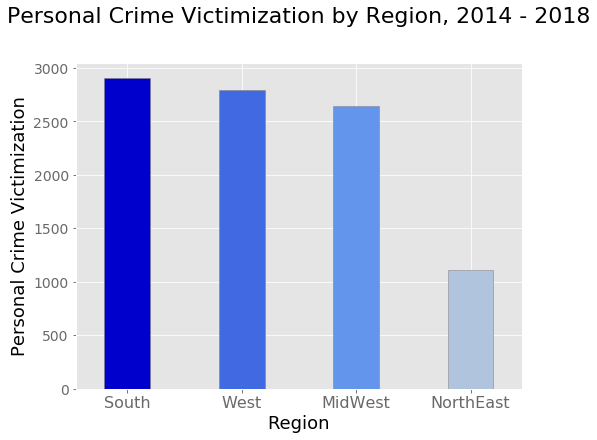

In [69]:
# Personal crime bar chart by region:
p_chart=pcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)

# Set x-label, y-label, and title:
p_chart.set_title('Personal Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
p_chart.set_xlabel('Region',fontsize=18, color='black')
p_chart.set_ylabel('Personal Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in p_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in p_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 3050)

#plt.savefig('output_data/Personal Crime Region.png', bbox_inches='tight')

plt.show()

---
###### Household Crime Victimization by Region, 2014 - 2018

In [15]:
# Calculate total crime by region:
hcrime_by_region=ncvs_h['region'].value_counts()
hcrime_by_region

South        11963
West         11220
Midwest       9347
Northeast     3748
Name: region, dtype: int64

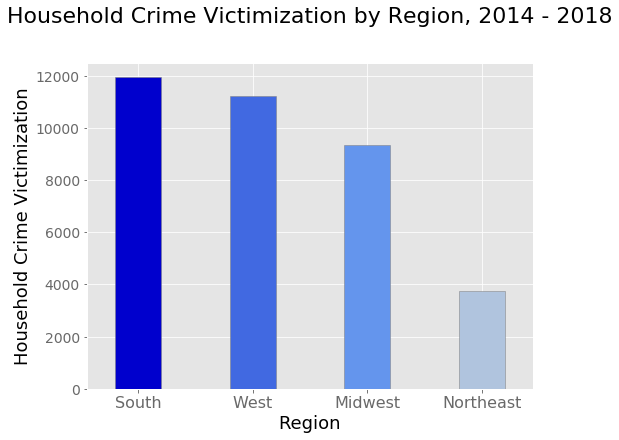

In [70]:
# Household crime bar chart by region:
h_chart=hcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)

# Set x-label, y-label, and title:
h_chart.set_title('Household Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
h_chart.set_xlabel('Region',fontsize=18, color='black')
h_chart.set_ylabel('Household Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in h_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in h_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 12500)

#plt.savefig('output_data/Household Crime Region.png', bbox_inches='tight')

plt.show()

---
###### Personal Crime Victimization Change by Region, 2014 - 2018

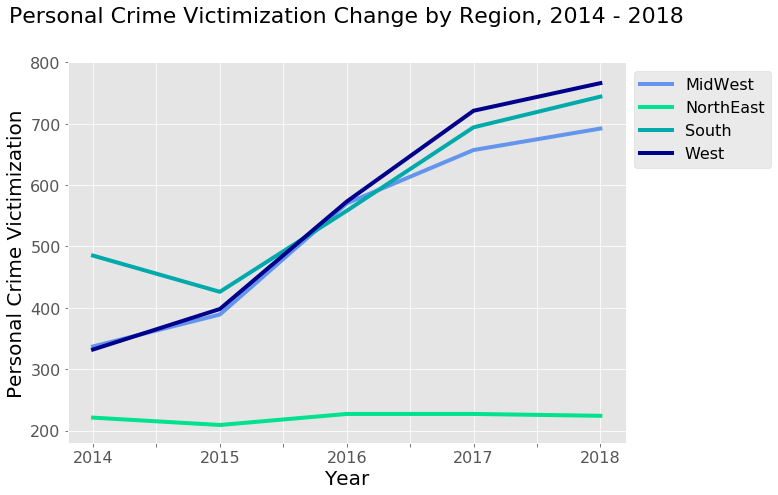

In [71]:
# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
pyear_grouped_df=ncvs.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Personal Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Personal Crime Victimization', fontsize=20, color='black')
plt.ylim(180,800)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

#plt.savefig('output_data/Personal Crime Change.png', bbox_inches='tight')    
    
plt.show()

---
###### Household Crime Victimization Change by Region, 2014 - 2018

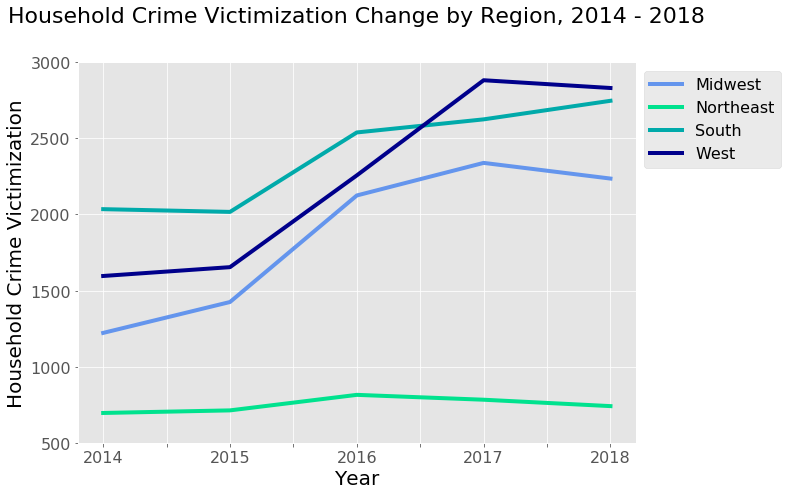

In [72]:
# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
hyear_grouped_df=ncvs_h.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Household Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Household Crime Victimization', fontsize=20, color='black')
plt.ylim(500,3000)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

#plt.savefig('output_data/Household Crime Change.png', bbox_inches='tight')    
    
plt.show()

---
## Analysis by Age Category
---

###### Average Personal Crime Victimization by Age Category and Region, 2014 - 2018

In [19]:
# Extruct columns of interest from original data frame:
ncvs_2=ncvs[['region','year','age']]

# West
pvictim_avg_by_age_west=ncvs_2[ncvs_2['region'] == 'West']
pvictim_avg_by_age_west=pvictim_avg_by_age_west.groupby(['year','age']).count()['region'].unstack()

# West - New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_west_df=pvictim_avg_by_age_west.mean().reset_index()

# West - Rename column:
avg_pvictim_vs_age_west_df=avg_pvictim_vs_age_west_df.rename(columns={0:'Avg Victim Count'})

# West - Sort by age groups:
avg_pvictim_vs_age_west_df=round(avg_pvictim_vs_age_west_df,0)


# South
pvictim_avg_by_age_south=ncvs_2[ncvs_2['region'] == 'South']
pvictim_avg_by_age_south=pvictim_avg_by_age_south.groupby(['year','age']).count()['region'].unstack()

# South - New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_south_df=pvictim_avg_by_age_south.mean().reset_index()

# South - Rename column:
avg_pvictim_vs_age_south_df=avg_pvictim_vs_age_south_df.rename(columns={0:'Avg Victim Count'})

# South - Sort by age groups:
avg_pvictim_vs_age_south_df=round(avg_pvictim_vs_age_south_df,0)


# Midwest
pvictim_avg_by_age_miwe=ncvs_2[ncvs_2['region'] == 'MidWest']
pvictim_avg_by_age_miwe=pvictim_avg_by_age_miwe.groupby(['year','age']).count()['region'].unstack()

# Midwest - New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_miwe_df=pvictim_avg_by_age_miwe.mean().reset_index()

# Midwest - Rename column:
avg_pvictim_vs_age_miwe_df=avg_pvictim_vs_age_miwe_df.rename(columns={0:'Avg Victim Count'})

# Midwest - Sort by age groups:
avg_pvictim_vs_age_miwe_df=round(avg_pvictim_vs_age_miwe_df,0)


# Northeast
pvictim_avg_by_age_noea=ncvs_2[ncvs_2['region'] == 'NorthEast']
pvictim_avg_by_age_noea=pvictim_avg_by_age_noea.groupby(['year','age']).count()['region'].unstack()

# Northeast - New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_noea_df=pvictim_avg_by_age_noea.mean().reset_index()

# Northeast - Rename column:
avg_pvictim_vs_age_noea_df=avg_pvictim_vs_age_noea_df.rename(columns={0:'Avg Victim Count'})

# Northeast - Sort by age groups:
avg_pvictim_vs_age_noea_df=round(avg_pvictim_vs_age_noea_df,0)

#print(avg_pvictim_vs_age_west_df)
#print(avg_pvictim_vs_age_south_df)
#print(avg_pvictim_vs_age_miwe_df)
#print(avg_pvictim_vs_age_noea_df)

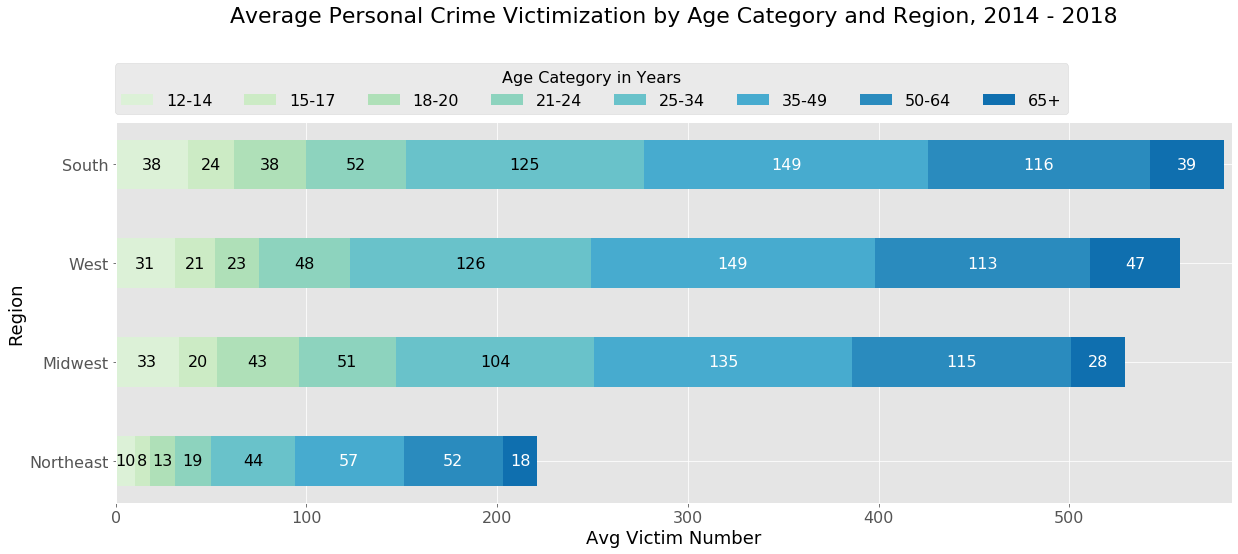

In [77]:
# Generate a discrete distribution as horizontal bar chart of age category vs average victim count between 2014-2018:

category_names = avg_pvictim_vs_age_south_df.iloc[:,0]
    
results = {
    'South': avg_pvictim_vs_age_south_df.iloc[:,1],
    'West': avg_pvictim_vs_age_west_df.iloc[:,1],
    'Midwest': avg_pvictim_vs_age_miwe_df.iloc[:,1],
    'Northeast': avg_pvictim_vs_age_noea_df.iloc[:,1]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('GnBu')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.xaxis.set_label_text('Avg Victim Number', fontsize=18, color='black')
    ax.yaxis.set_label_text('Region', fontsize=18, color='black')
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.2 else 'black'
        #print(r, g , b)
    
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if (data[y, i]) < 5.0:
                ha1= 'left'
            else:
                ha1= 'center'
            #print(data[y, i])
            #print(ha1)
            ax.text(x, y, str(int(c)), ha=ha1, va='center',
            color=text_color, size=16)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.008, 1),
              loc='lower left', fontsize='medium', title='Age Category in Years')

    return fig, ax

survey(results, category_names)
plt.title('Average Personal Crime Victimization by Age Category and Region, 2014 - 2018', fontsize=22, pad=100)

plt.xlim(0,585)

#plt.savefig('output_data/Personal Crime Age and Region.png', bbox_inches='tight')

plt.show()

---
###### Average Household Crime Victimization by Age Category and Region, 2014 - 2018

In [26]:
# Extruct columns of interest from original data frame:
ncvs_h2=ncvs_h[['region','year','age']]
ncvs_h2

# West
hvictim_avg_by_age_west=ncvs_h2[ncvs_h2['region'] == 'West']
hvictim_avg_by_age_west=hvictim_avg_by_age_west.groupby(['year','age']).count()['region'].unstack()

# West - New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_west_df=hvictim_avg_by_age_west.mean().reset_index()

# West - Rename column:
avg_hvictim_vs_age_west_df=avg_hvictim_vs_age_west_df.rename(columns={0:'Avg Victim Count'})

# West - Sort by age groups:
avg_hvictim_vs_age_west_df=round(avg_hvictim_vs_age_west_df.loc[[4,0,1,2,3],:],0)


# South
hvictim_avg_by_age_south=ncvs_h2[ncvs_h2['region'] == 'South']
hvictim_avg_by_age_south=hvictim_avg_by_age_south.groupby(['year','age']).count()['region'].unstack()

# South - New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_south_df=hvictim_avg_by_age_south.mean().reset_index()

# South - Rename column:
avg_hvictim_vs_age_south_df=avg_hvictim_vs_age_south_df.rename(columns={0:'Avg Victim Count'})

# South - Sort by age groups:
avg_hvictim_vs_age_south_df=round(avg_hvictim_vs_age_south_df.loc[[4,0,1,2,3],:],0)


# Midwest
hvictim_avg_by_age_miwe=ncvs_h2[ncvs_h2['region'] == 'Midwest']
hvictim_avg_by_age_miwe=hvictim_avg_by_age_miwe.groupby(['year','age']).count()['region'].unstack()

# Midwest - New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_miwe_df=hvictim_avg_by_age_miwe.mean().reset_index()

# Midwest - Rename column:
avg_hvictim_vs_age_miwe_df=avg_hvictim_vs_age_miwe_df.rename(columns={0:'Avg Victim Count'})

# Midwest - Sort by age groups:
avg_hvictim_vs_age_miwe_df=round(avg_hvictim_vs_age_miwe_df.loc[[4,0,1,2,3],:],0)


# Northeast
hvictim_avg_by_age_noea=ncvs_h2[ncvs_h2['region'] == 'Northeast']
hvictim_avg_by_age_noea=hvictim_avg_by_age_noea.groupby(['year','age']).count()['region'].unstack()

# Northeast - New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_noea_df=hvictim_avg_by_age_noea.mean().reset_index()

# Northeast - Rename column:
avg_hvictim_vs_age_noea_df=avg_hvictim_vs_age_noea_df.rename(columns={0:'Avg Victim Count'})

# Northeast - Sort by age groups:
avg_hvictim_vs_age_noea_df=round(avg_hvictim_vs_age_noea_df.loc[[4,0,1,2,3],:],0)

#print(avg_hvictim_vs_age_west_df)
#print(avg_hvictim_vs_age_south_df)
#print(avg_hvictim_vs_age_miwe_df)
#print(avg_hvictim_vs_age_noea_df)

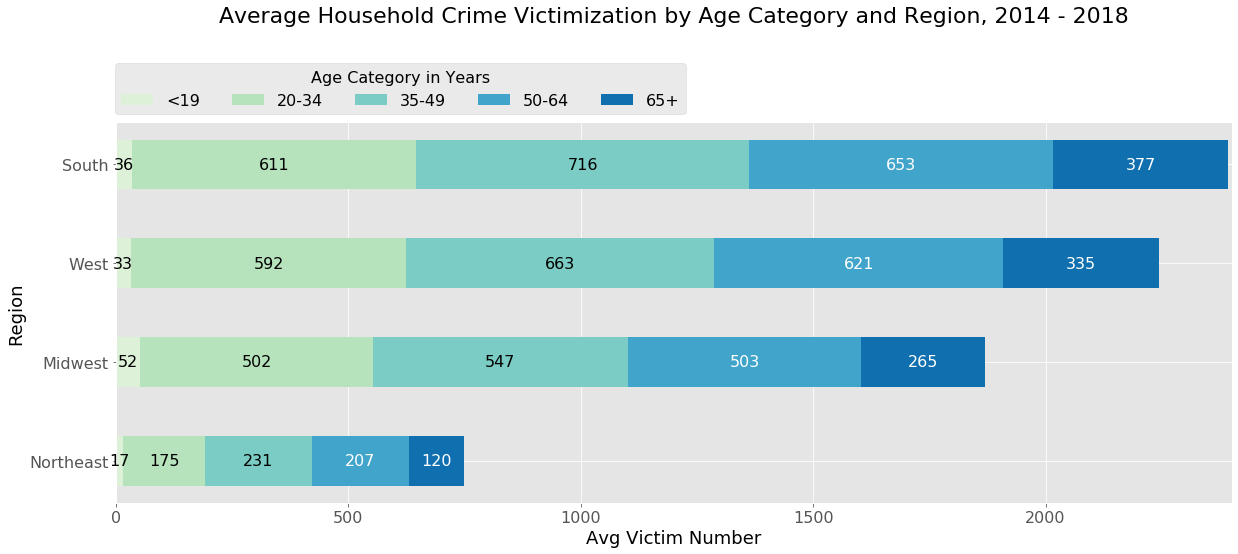

In [78]:
# Generate a discrete distribution as horizontal bar chart of age category vs average victim count between 2014-2018:

category_names = avg_hvictim_vs_age_south_df.iloc[:,0]
    
results = {
    'South': avg_hvictim_vs_age_south_df.iloc[:,1],
    'West': avg_hvictim_vs_age_west_df.iloc[:,1],
    'Midwest': avg_hvictim_vs_age_miwe_df.iloc[:,1],
    'Northeast': avg_hvictim_vs_age_noea_df.iloc[:,1]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('GnBu')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.xaxis.set_label_text('Avg Victim Number', fontsize=18, color='black')
    ax.yaxis.set_label_text('Region', fontsize=18, color='black')
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.2 else 'black'
        
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if (data[y, i]) < 16.0:
                ha1= 'left'
            else:
                ha1= 'center'
            #print(data[y, i])
            #print(ha1)
            ax.text(x, y, str(int(c)), ha=ha1, va='center',
            color=text_color, size=16)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.008, 1),
              loc='lower left', fontsize='medium', title='Age Category in Years')

    return fig, ax

survey(results, category_names)
plt.title('Average Household Crime Victimization by Age Category and Region, 2014 - 2018', fontsize=22, pad=100)

plt.xlim(0,2400)

#plt.savefig('output_data/Household Crime Age and Region.png', bbox_inches='tight')

plt.show()